In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [53]:
df = pd.read_csv(r"C:\Users\91628\Downloads\Zudio_sales_data (1).csv")

In [54]:
df

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Zudio,India,Uttar Pradesh,Chandigarh,Kids,Jeans,32,431437,Owned,2024-04-24,...,"CCTV, Alarm",39056,2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
7895,Zudio,India,Uttar Pradesh,Aurangabad,Kids,Jackets,52,424643,Owned,2024-02-03,...,Alarm,85486,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
7896,Zudio,India,Tamil Nadu,Pune,Kids,T-shirts,81,412057,Owned,2021-04-11,...,"CCTV, Alarm",78200,2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4
7897,Zudio,India,Delhi,Madurai,Men,Shoes,58,405203,Rented,2022-06-17,...,CCTV,19883,2024-07-29,July,766283,John Lewis,608,1017,8,3254.4


In [55]:
df.head()

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0


In [56]:
df.tail()

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
7894,Zudio,India,Uttar Pradesh,Chandigarh,Kids,Jeans,32,431437,Owned,2024-04-24,...,"CCTV, Alarm",39056,2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
7895,Zudio,India,Uttar Pradesh,Aurangabad,Kids,Jackets,52,424643,Owned,2024-02-03,...,Alarm,85486,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
7896,Zudio,India,Tamil Nadu,Pune,Kids,T-shirts,81,412057,Owned,2021-04-11,...,"CCTV, Alarm",78200,2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4
7897,Zudio,India,Delhi,Madurai,Men,Shoes,58,405203,Rented,2022-06-17,...,CCTV,19883,2024-07-29,July,766283,John Lewis,608,1017,8,3254.4
7898,Zudio,India,Gujarat,Bengaluru,Women,Shirts,20,429823,Owned,2023-02-08,...,"CCTV, Alarm",91451,2024-04-08,April,541226,Nicholas Salazar,583,2773,5,5546.0


In [57]:



df.describe()

,Store Number,Postal Code,Selling Area Size (sq ft),Staff Count,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit
count,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000
mean,50.666034,419982.374984,1112.077478,11.504747,54920.719965,549440.714521,602.069376,1761.113432,4.519433,3170.671376
std,29.095274,11695.237817,193.239371,5.194722,25894.206850,262418.912565,232.066189,716.269447,2.292373,2141.249886
min,1.000000,400006.000000,800.000000,3.000000,10008.000000,100153.000000,204.000000,499.000000,1.000000,200.400000
25%,25.000000,409841.000000,950.000000,7.000000,33192.000000,318516.500000,398.000000,1136.000000,3.000000,1411.200000
50%,51.000000,419988.000000,1100.000000,12.000000,54873.000000,546012.000000,602.000000,1782.000000,5.000000,2681.600000
75%,76.000000,430258.000000,1300.000000,16.000000,77285.000000,780304.000000,803.500000,2373.000000,7.000000,4570.400000
max,100.000000,439985.000000,1400.000000,20.000000,99999.000000,999858.000000,999.000000,2999.000000,8.000000,9596.800000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      7899 non-null   object 
 1   Country                    7899 non-null   object 
 2   State                      7899 non-null   object 
 3   City                       7899 non-null   object 
 4   Category                   7899 non-null   object 
 5   Clothing Type              7899 non-null   object 
 6   Store Number               7899 non-null   int64  
 7   Postal Code                7899 non-null   int64  
 8   Store Type                 7899 non-null   object 
 9   Store Open Date            7899 non-null   object 
 10  Selling Area Size (sq ft)  7899 non-null   int64  
 11  Store Manager              7899 non-null   object 
 12  Manager ID                 7899 non-null   object 
 13  Store Address              7899 non-null   objec

In [59]:
df.isnull().sum()

Store                           0
Country                         0
State                           0
City                            0
Category                        0
Clothing Type                   0
Store Number                    0
Postal Code                     0
Store Type                      0
Store Open Date                 0
Selling Area Size (sq ft)       0
Store Manager                   0
Manager ID                      0
Store Address                   0
Contact Information             0
Operating Hours                 0
Staff Count                     0
Parking Availability            0
Security Features            2038
Order ID                        0
Order Date                      0
Month                           0
Customer ID                     0
Customer Name                   0
Product ID                      0
Price                           0
Quantity                        0
Sales Profit                    0
dtype: int64

In [60]:
df.nunique()

Store                           1
Country                         1
State                           8
City                           42
Category                        3
Clothing Type                  11
Store Number                  100
Postal Code                  7131
Store Type                      2
Store Open Date              1774
Selling Area Size (sq ft)       7
Store Manager                7476
Manager ID                    100
Store Address                7899
Contact Information          7899
Operating Hours                 4
Staff Count                    18
Parking Availability            2
Security Features               3
Order ID                     7559
Order Date                    338
Month                          12
Customer ID                  7870
Customer Name                7499
Product ID                    796
Price                        2404
Quantity                        8
Sales Profit                 5458
dtype: int64

In [61]:
df

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Zudio,India,Uttar Pradesh,Chandigarh,Kids,Jeans,32,431437,Owned,2024-04-24,...,"CCTV, Alarm",39056,2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
7895,Zudio,India,Uttar Pradesh,Aurangabad,Kids,Jackets,52,424643,Owned,2024-02-03,...,Alarm,85486,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
7896,Zudio,India,Tamil Nadu,Pune,Kids,T-shirts,81,412057,Owned,2021-04-11,...,"CCTV, Alarm",78200,2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4
7897,Zudio,India,Delhi,Madurai,Men,Shoes,58,405203,Rented,2022-06-17,...,CCTV,19883,2024-07-29,July,766283,John Lewis,608,1017,8,3254.4


In [62]:
df[['State','City','Category','Clothing Type','Order ID','Customer ID','Product ID','Price','Quantity','Sales Profit']]

,State,City,Category,Clothing Type,Order ID,Customer ID,Product ID,Price,Quantity,Sales Profit
0,Karnataka,Jalna,Women,Dresses,88240,233084,354,1958,5,3916.0
1,Gujarat,Patna,Kids,Skirts,78145,926472,741,2078,1,831.2
2,Uttar Pradesh,Kolkata,Men,Hoodies,33363,853255,607,1445,2,1156.0
3,West Bengal,Kolkata,Women,Dresses,46682,106146,991,2469,6,5925.6
4,West Bengal,Guwahati,Men,Dresses,58242,264070,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...
7894,Uttar Pradesh,Chandigarh,Kids,Jeans,39056,591993,262,2838,1,1135.2
7895,Uttar Pradesh,Aurangabad,Kids,Jackets,85486,822244,537,1814,2,1451.2
7896,Tamil Nadu,Pune,Kids,T-shirts,78200,268376,457,1961,1,784.4
7897,Delhi,Madurai,Men,Shoes,19883,766283,608,1017,8,3254.4


In [63]:
df[['Order ID','Customer ID','State','City','Category','Clothing Type','Product ID','Price','Quantity','Sales Profit']]

,Order ID,Customer ID,State,City,Category,Clothing Type,Product ID,Price,Quantity,Sales Profit
0,88240,233084,Karnataka,Jalna,Women,Dresses,354,1958,5,3916.0
1,78145,926472,Gujarat,Patna,Kids,Skirts,741,2078,1,831.2
2,33363,853255,Uttar Pradesh,Kolkata,Men,Hoodies,607,1445,2,1156.0
3,46682,106146,West Bengal,Kolkata,Women,Dresses,991,2469,6,5925.6
4,58242,264070,West Bengal,Guwahati,Men,Dresses,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...
7894,39056,591993,Uttar Pradesh,Chandigarh,Kids,Jeans,262,2838,1,1135.2
7895,85486,822244,Uttar Pradesh,Aurangabad,Kids,Jackets,537,1814,2,1451.2
7896,78200,268376,Tamil Nadu,Pune,Kids,T-shirts,457,1961,1,784.4
7897,19883,766283,Delhi,Madurai,Men,Shoes,608,1017,8,3254.4


In [64]:
df['Discounted price']=df['Price']*0.7

In [65]:
df

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit,Discounted price
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0,1370.6
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2,1454.6
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0,1011.5
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6,1728.3
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0,773.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Zudio,India,Uttar Pradesh,Chandigarh,Kids,Jeans,32,431437,Owned,2024-04-24,...,39056,2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2,1986.6
7895,Zudio,India,Uttar Pradesh,Aurangabad,Kids,Jackets,52,424643,Owned,2024-02-03,...,85486,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2,1269.8
7896,Zudio,India,Tamil Nadu,Pune,Kids,T-shirts,81,412057,Owned,2021-04-11,...,78200,2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4,1372.7
7897,Zudio,India,Delhi,Madurai,Men,Shoes,58,405203,Rented,2022-06-17,...,19883,2024-07-29,July,766283,John Lewis,608,1017,8,3254.4,711.9


In [66]:
df.drop(columns='Discounted price',inplace=True)

In [67]:


df

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,Zudio,India,Uttar Pradesh,Chandigarh,Kids,Jeans,32,431437,Owned,2024-04-24,...,"CCTV, Alarm",39056,2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
7895,Zudio,India,Uttar Pradesh,Aurangabad,Kids,Jackets,52,424643,Owned,2024-02-03,...,Alarm,85486,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
7896,Zudio,India,Tamil Nadu,Pune,Kids,T-shirts,81,412057,Owned,2021-04-11,...,"CCTV, Alarm",78200,2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4
7897,Zudio,India,Delhi,Madurai,Men,Shoes,58,405203,Rented,2022-06-17,...,CCTV,19883,2024-07-29,July,766283,John Lewis,608,1017,8,3254.4


In [68]:
df.set_index(['Order ID','Category'],inplace=True)

In [69]:
df

,,Store,Country,State,City,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,Selling Area Size (sq ft),...,Parking Availability,Security Features,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
Order ID,Category,,,,,,,,,,,,,,,,,,,,,
88240,Women,Zudio,India,Karnataka,Jalna,Dresses,30,411084,Owned,2022-06-04,950,...,Not Available,Alarm,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
78145,Kids,Zudio,India,Gujarat,Patna,Skirts,48,404562,Owned,2020-12-19,1200,...,Not Available,Alarm,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
33363,Men,Zudio,India,Uttar Pradesh,Kolkata,Hoodies,97,437773,Rented,2023-09-04,1100,...,Not Available,CCTV,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
46682,Women,Zudio,India,West Bengal,Kolkata,Dresses,93,431725,Owned,2024-04-11,1400,...,Not Available,CCTV,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
58242,Men,Zudio,India,West Bengal,Guwahati,Dresses,51,415370,Owned,2022-05-29,1400,...,Not Available,"CCTV, Alarm",2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39056,Kids,Zudio,India,Uttar Pradesh,Chandigarh,Jeans,32,431437,Owned,2024-04-24,1200,...,Not Available,"CCTV, Alarm",2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
85486,Kids,Zudio,India,Uttar Pradesh,Aurangabad,Jackets,52,424643,Owned,2024-02-03,950,...,Not Available,Alarm,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
78200,Kids,Zudio,India,Tamil Nadu,Pune,T-shirts,81,412057,Owned,2021-04-11,800,...,Not Available,"CCTV, Alarm",2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4


In [70]:
df.reset_index('Category',inplace=True)

In [71]:
df

,Category,Store,Country,State,City,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Parking Availability,Security Features,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
Order ID,,,,,,,,,,,,,,,,,,,,,
88240,Women,Zudio,India,Karnataka,Jalna,Dresses,30,411084,Owned,2022-06-04,...,Not Available,Alarm,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
78145,Kids,Zudio,India,Gujarat,Patna,Skirts,48,404562,Owned,2020-12-19,...,Not Available,Alarm,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
33363,Men,Zudio,India,Uttar Pradesh,Kolkata,Hoodies,97,437773,Rented,2023-09-04,...,Not Available,CCTV,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
46682,Women,Zudio,India,West Bengal,Kolkata,Dresses,93,431725,Owned,2024-04-11,...,Not Available,CCTV,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
58242,Men,Zudio,India,West Bengal,Guwahati,Dresses,51,415370,Owned,2022-05-29,...,Not Available,"CCTV, Alarm",2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39056,Kids,Zudio,India,Uttar Pradesh,Chandigarh,Jeans,32,431437,Owned,2024-04-24,...,Not Available,"CCTV, Alarm",2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
85486,Kids,Zudio,India,Uttar Pradesh,Aurangabad,Jackets,52,424643,Owned,2024-02-03,...,Not Available,Alarm,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
78200,Kids,Zudio,India,Tamil Nadu,Pune,T-shirts,81,412057,Owned,2021-04-11,...,Not Available,"CCTV, Alarm",2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4


In [72]:
df.loc[df['Quantity']>3,'Quantity']=6

In [73]:
df

,Category,Store,Country,State,City,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Parking Availability,Security Features,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
Order ID,,,,,,,,,,,,,,,,,,,,,
88240,Women,Zudio,India,Karnataka,Jalna,Dresses,30,411084,Owned,2022-06-04,...,Not Available,Alarm,2024-11-06,November,233084,Michele Ochoa,354,1958,6,3916.0
78145,Kids,Zudio,India,Gujarat,Patna,Skirts,48,404562,Owned,2020-12-19,...,Not Available,Alarm,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
33363,Men,Zudio,India,Uttar Pradesh,Kolkata,Hoodies,97,437773,Rented,2023-09-04,...,Not Available,CCTV,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
46682,Women,Zudio,India,West Bengal,Kolkata,Dresses,93,431725,Owned,2024-04-11,...,Not Available,CCTV,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
58242,Men,Zudio,India,West Bengal,Guwahati,Dresses,51,415370,Owned,2022-05-29,...,Not Available,"CCTV, Alarm",2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39056,Kids,Zudio,India,Uttar Pradesh,Chandigarh,Jeans,32,431437,Owned,2024-04-24,...,Not Available,"CCTV, Alarm",2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
85486,Kids,Zudio,India,Uttar Pradesh,Aurangabad,Jackets,52,424643,Owned,2024-02-03,...,Not Available,Alarm,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
78200,Kids,Zudio,India,Tamil Nadu,Pune,T-shirts,81,412057,Owned,2021-04-11,...,Not Available,"CCTV, Alarm",2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4


In [74]:
df.iloc[[19,1],[1,3]]

,Store,State
Order ID,,
14350,Zudio,Rajasthan
78145,Zudio,Gujarat


In [75]:
df_dropped=df.dropna()
df_dropped

,Category,Store,Country,State,City,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Parking Availability,Security Features,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
Order ID,,,,,,,,,,,,,,,,,,,,,
88240,Women,Zudio,India,Karnataka,Jalna,Dresses,30,411084,Owned,2022-06-04,...,Not Available,Alarm,2024-11-06,November,233084,Michele Ochoa,354,1958,6,3916.0
78145,Kids,Zudio,India,Gujarat,Patna,Skirts,48,404562,Owned,2020-12-19,...,Not Available,Alarm,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
33363,Men,Zudio,India,Uttar Pradesh,Kolkata,Hoodies,97,437773,Rented,2023-09-04,...,Not Available,CCTV,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
46682,Women,Zudio,India,West Bengal,Kolkata,Dresses,93,431725,Owned,2024-04-11,...,Not Available,CCTV,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
58242,Men,Zudio,India,West Bengal,Guwahati,Dresses,51,415370,Owned,2022-05-29,...,Not Available,"CCTV, Alarm",2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39056,Kids,Zudio,India,Uttar Pradesh,Chandigarh,Jeans,32,431437,Owned,2024-04-24,...,Not Available,"CCTV, Alarm",2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2
85486,Kids,Zudio,India,Uttar Pradesh,Aurangabad,Jackets,52,424643,Owned,2024-02-03,...,Not Available,Alarm,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2
78200,Kids,Zudio,India,Tamil Nadu,Pune,T-shirts,81,412057,Owned,2021-04-11,...,Not Available,"CCTV, Alarm",2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4


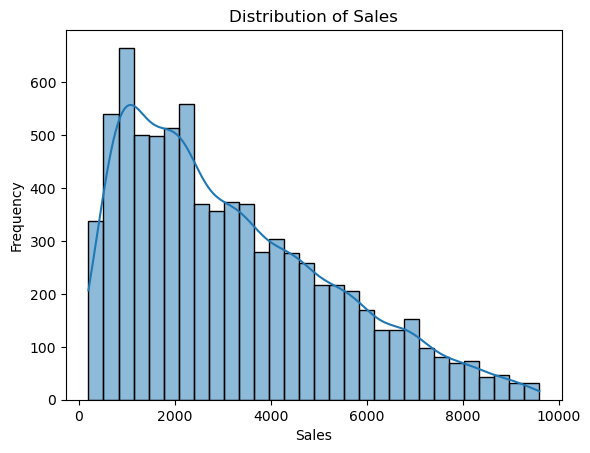

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Sales
sns.histplot(df['Sales Profit'], kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


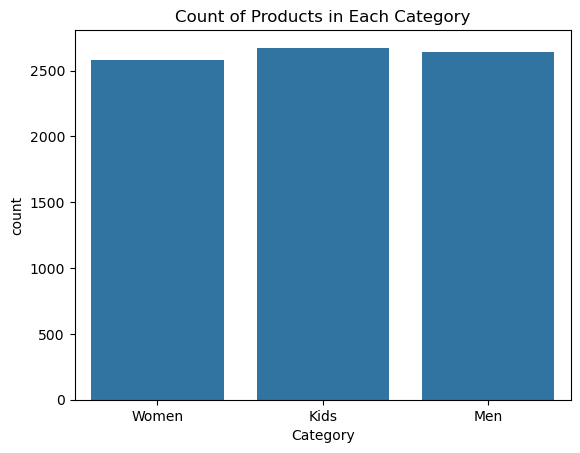

In [77]:
sns.countplot(x='Category', data=df)
plt.title("Count of Products in Each Category")
plt.show()

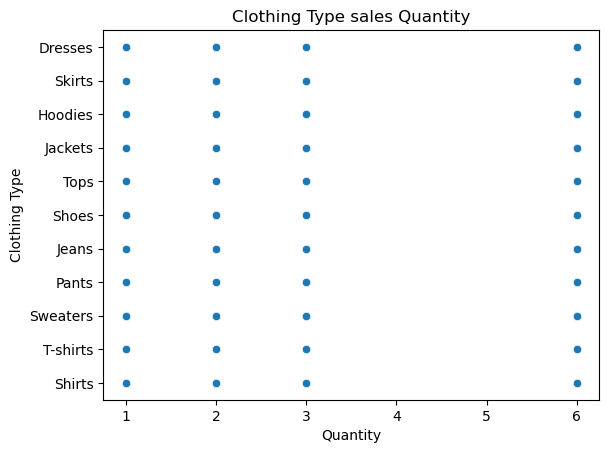

In [78]:
sns.scatterplot(x='Quantity', y='Clothing Type', data=df)
plt.title("Clothing Type sales Quantity")
plt.show()

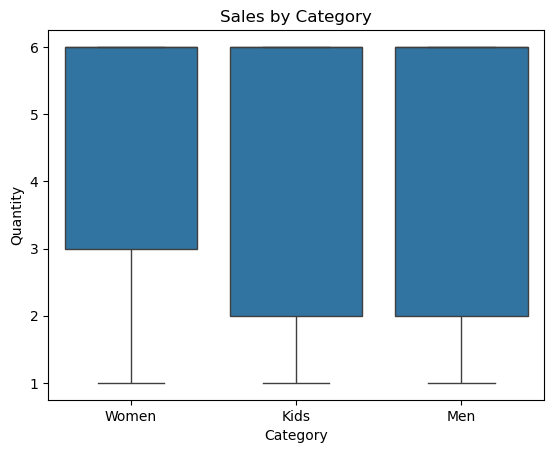

In [79]:
sns.boxplot(x='Category', y='Quantity', data=df)
plt.title("Sales by Category")
plt.show()

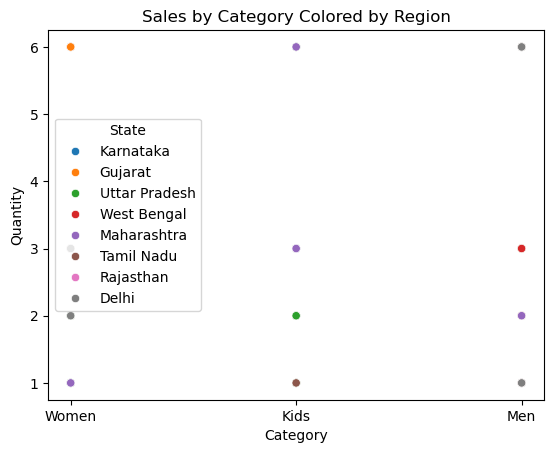

In [80]:
sns.scatterplot(x='Category', y='Quantity', hue='State', data=df)
plt.title("Sales by Category Colored by Region")
plt.show()

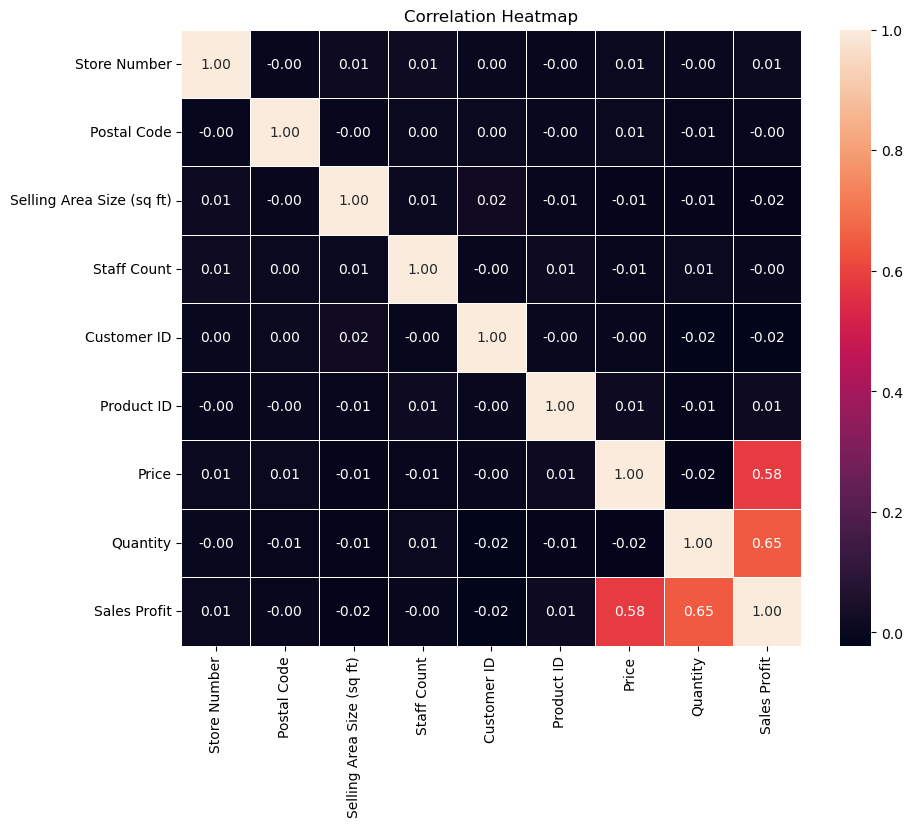

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)  # only use numeric columns

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True,  linewidths=0.5, fmt=".2f")

# Add a title
plt.title("Correlation Heatmap")
plt.show()


In [82]:
X=df[['Price','Quantity']]
y=df[['Sales Profit']]

In [83]:
X

,Price,Quantity
Order ID,,
88240,1958,6
78145,2078,1
33363,1445,2
46682,2469,6
58242,1105,6
...,...,...
39056,2838,1
85486,1814,2
78200,1961,1


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [86]:
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print('mae',mae)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

mae 808.5041425003592
mse 997028.3628041632
rmse 998.5130759304874
r2 0.7824154686278934


In [89]:
y_pred1 = model.predict(X)

In [90]:
df['y_pred']=y_pred1

In [91]:
df

,Category,Store,Country,State,City,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit,y_pred
Order ID,,,,,,,,,,,,,,,,,,,,,
88240,Women,Zudio,India,Karnataka,Jalna,Dresses,30,411084,Owned,2022-06-04,...,Alarm,2024-11-06,November,233084,Michele Ochoa,354,1958,6,3916.0,4572.576201
78145,Kids,Zudio,India,Gujarat,Patna,Skirts,48,404562,Owned,2020-12-19,...,Alarm,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2,1241.858072
33363,Men,Zudio,India,Uttar Pradesh,Kolkata,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0,821.779870
46682,Women,Zudio,India,West Bengal,Kolkata,Dresses,93,431725,Owned,2024-04-11,...,CCTV,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6,5484.003712
58242,Men,Zudio,India,West Bengal,Guwahati,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0,3051.152196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39056,Kids,Zudio,India,Uttar Pradesh,Chandigarh,Jeans,32,431437,Owned,2024-04-24,...,"CCTV, Alarm",2024-09-27,September,591993,Tracey Andrews,262,2838,1,1135.2,2597.405837
85486,Kids,Zudio,India,Uttar Pradesh,Aurangabad,Jackets,52,424643,Owned,2024-02-03,...,Alarm,2024-03-16,March,822244,Linda Wallace,537,1814,2,1451.2,1479.933982
78200,Kids,Zudio,India,Tamil Nadu,Pune,T-shirts,81,412057,Owned,2021-04-11,...,"CCTV, Alarm",2024-12-02,December,268376,Brandon Baker,457,1961,1,784.4,1033.175061
